In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow #Parche especifico de colab, no tiene sentido si no se trabaja en este

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
generation = "MOD4GEN13"

In [ ]:
image_path = f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/img/shoe.jpg"

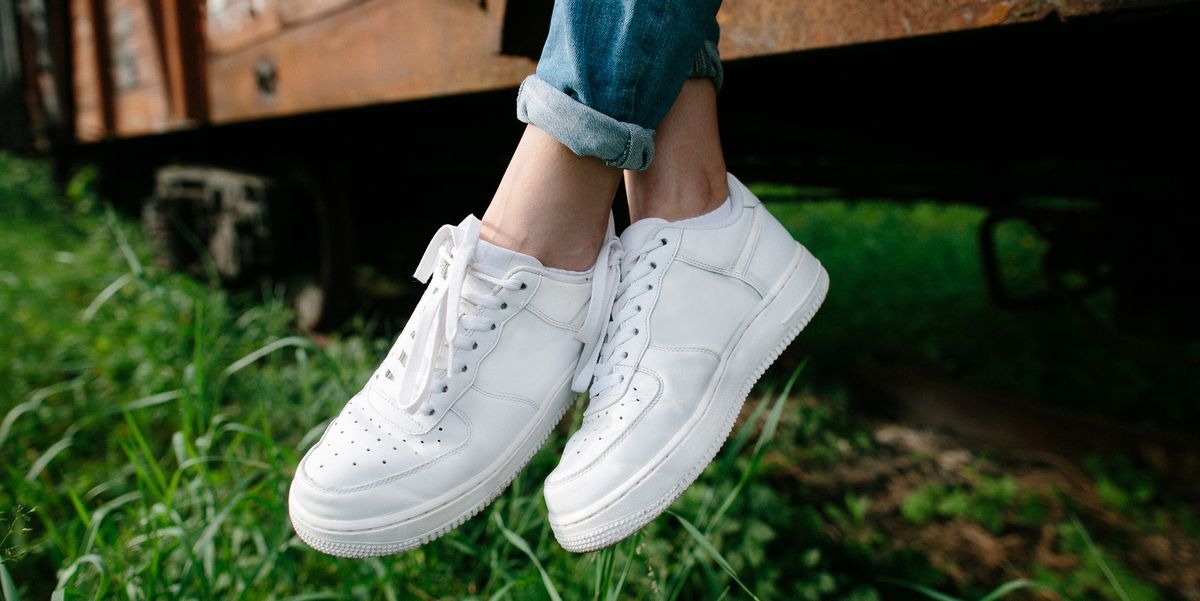

In [ ]:
image = cv2.imread(image_path) #Pasamos la ruta
cv2_imshow(image) #La visualizamos

In [ ]:
"""Los filtros sirven para el preprocesamiento y estas caracteristicas sirve como una ingenieria de variables.
Se definen con arreglos pasando la lista"""
# filtro identidad
identity = np.array((
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]), dtype="int")

# filtro de desenfoque
blur = np.array((
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]), dtype="float")

# filtro de nitidez
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# filtro Laplaciano (detección de bordes)
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# filtro Sobel eje x
sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# filtro Sobel eje y
sobel_y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [ ]:
#Definimos una tupla de filtros para tener mapeado el nombre del filtro con su arreglo matricial
filters = (
    ("identidad", identity),
    ("desenfoque", blur),
    ("nitidez", sharpen),
    ("laplaciano", laplacian),
    ("sobel_x", sobel_y),
    ("sobel_y", sobel_x)
)


[INFO] Aplicando el filtro identidad


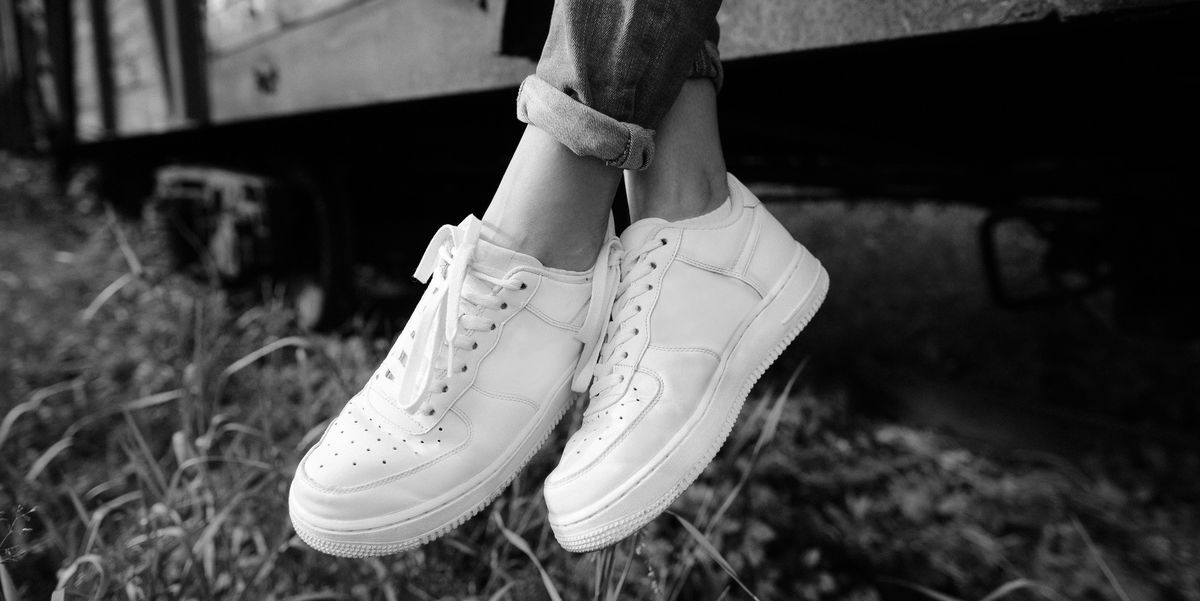


[INFO] Aplicando el filtro desenfoque


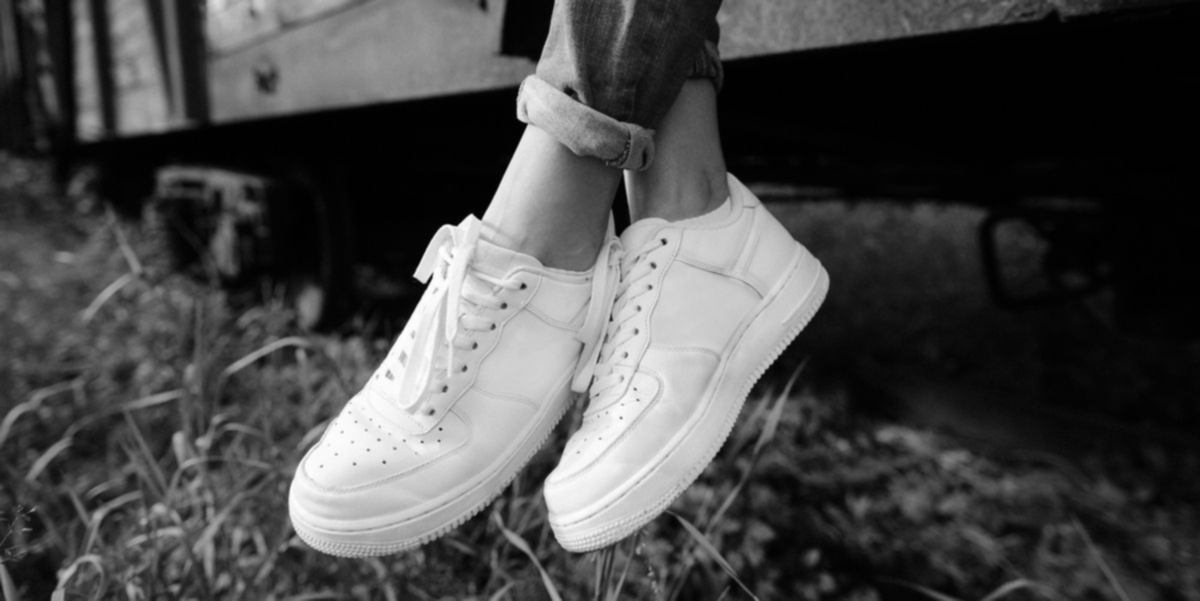


[INFO] Aplicando el filtro nitidez


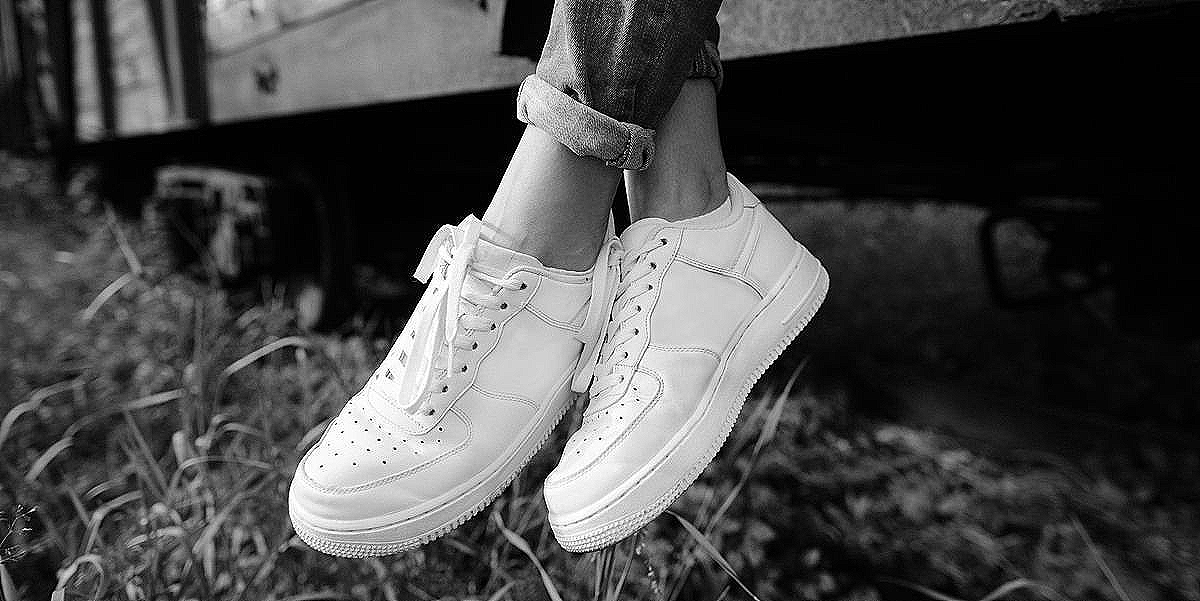


[INFO] Aplicando el filtro laplaciano


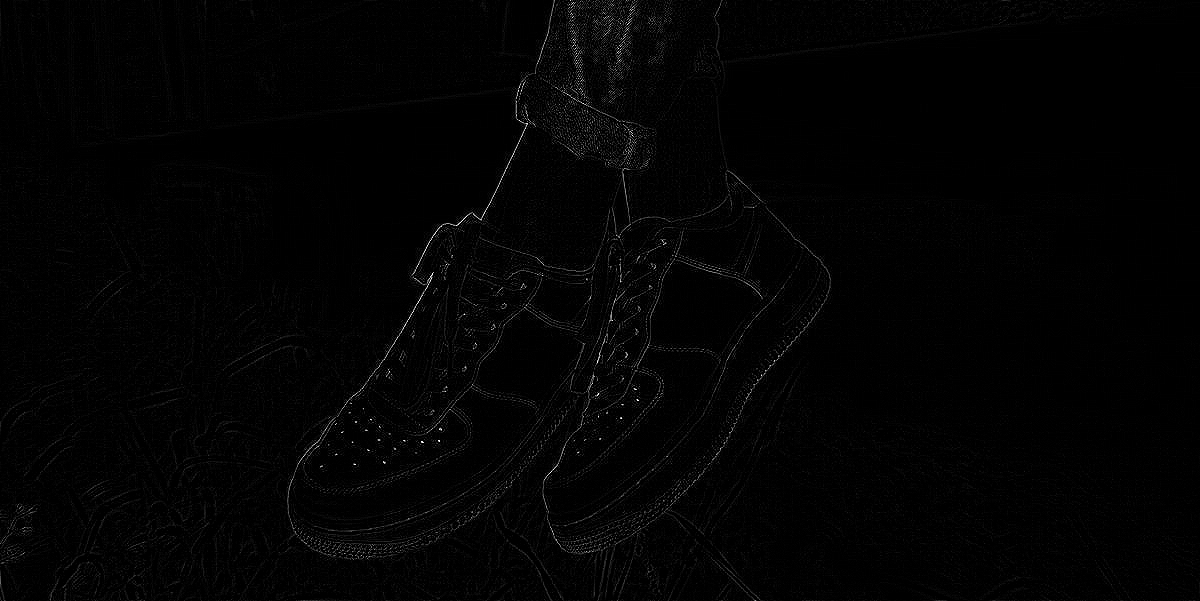


[INFO] Aplicando el filtro sobel_x


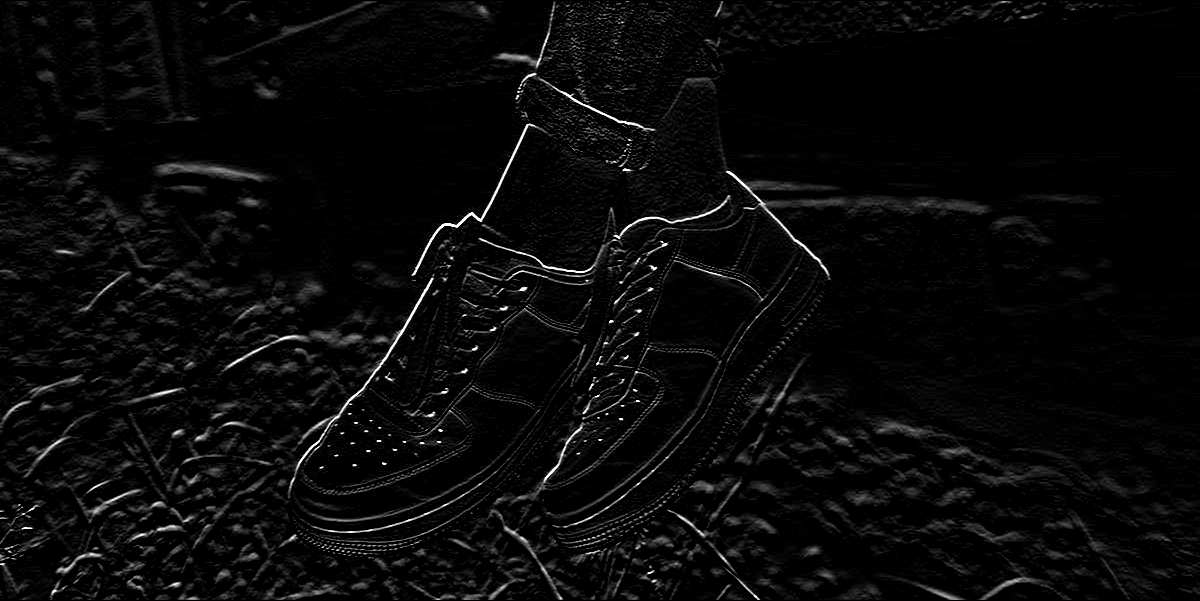


[INFO] Aplicando el filtro sobel_y


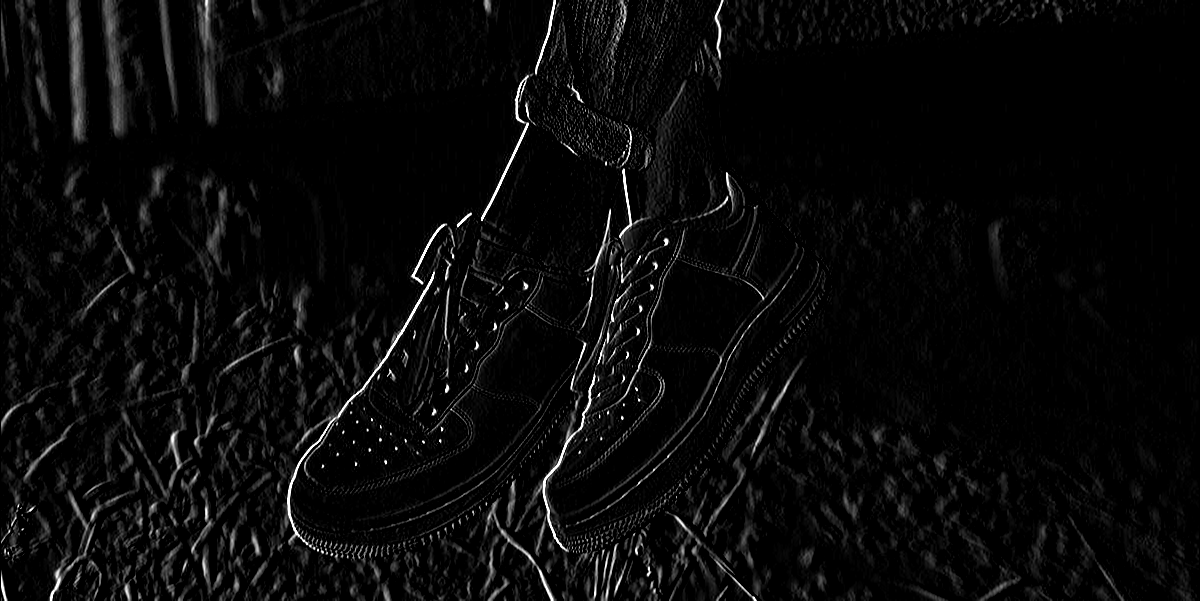

In [ ]:
# Lectura de la imagen de entrada y conversión a escala de grises
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Pasamos la imagen a escala de grises

for (filter_name, filter) in filters:
    # Aplica la operación de convolución a la imagen usando la función `filter2D`

    print("\n[INFO] Aplicando el filtro {}".format(filter_name))
    opencvOutput = cv2.filter2D(src=image, ddepth=-1, kernel=filter) #Iteramos sobre cada filtro, el filtro es en 2D
    """
    src: la imagen de origen sobre la que aplicar el filtro
    ddepth: es la profundidad deseable de la imagen de destino. El valor -1 representa que la imagen resultante tendrá la misma profundidad que la imagen de origen
    profundidad: mismo numero de canal de color.
    kernel: es la matriz del filtro aplicada sobre la imagen
    """

    # Muestra la imagen de salida
    cv2_imshow(opencvOutput)


* El filtro identidad da como salida la entrada (no realiza ningun cambio)
* El filtro de desenfoque o gausseano, aplica una capa de borrosidad sobre la imagen. Este filtro elimina mucho ruido de la imagen por lo cual es muy usado. La digitalizacion es un proceso de muestreo que causa ruido por eso se aplica esto. Con imagenes de menor dimension es mas agresivo
* Nitidez realza los detalles algunos elementos en la imagen
* Laplaceano sirve como un detector de bordes
* Sobel se resaltan elementos sobre ese eje

El cambio sobre del arreglo matricial dara un cambio alto en el filtro

Tip: si la suma de los elementos de la matriz da 1 nos indica un filtro de eliminacion de ruido. Si suma 0 es un detector de borde. Para nitidez dara 1.

Checar convolucion con una dimension mayor.

Se recomienda usar filtros pequeños porque las matrices grandes provocan perdida de información en los bordes.